In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "city_data.csv"
ride_data = "ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data)

ride_data_df = pd.read_csv(ride_data)
# Combine the data into a single dataset
pyber_data = pd.merge(ride_data_df, city_data_df, how='left',on= ["city",'city'])

# Display the data table for preview
pyber_data.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [2]:
# Create a proper dataframe for the Bubble plot 
rd = ride_data_df
cd = city_data_df
fare_average = (round(rd.groupby('city')['fare'].mean(),2))
total_rides =rd.groupby("city")["ride_id"].count()
total_drivers = cd.groupby("city")["driver_count"].mean()
city_type = cd.set_index('city')['type']

pcd = pd.DataFrame({"Average Fare per City":fare_average,
                 "Number of Rides": total_rides,
                 "Number of Drivers": total_drivers,
                 "City Type": city_type})

## Bubble Plot of Ride Sharing Data

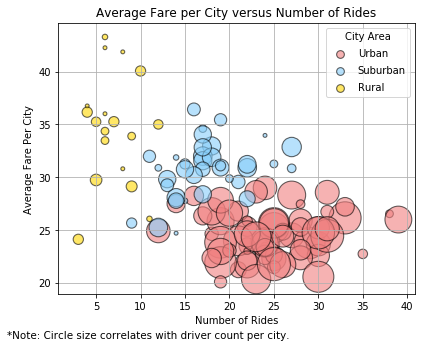

In [3]:
# Divide the data into 3 City Types
urban = pcd.loc[pcd['City Type']== 'Urban']
suburban = pcd.loc[pcd['City Type'] == 'Suburban']
rural = pcd.loc[pcd['City Type'] == 'Rural']
# Obtain the x and y coordinates for each of the three city types
sizemp = 15
alpha = .6
linewidth = 1.1
ux = urban["Number of Rides"]
uy = urban["Average Fare per City"]
us = urban["Number of Drivers"]*sizemp
sx = suburban["Number of Rides"]
sy = suburban["Average Fare per City"]
ss = suburban["Number of Drivers"]*sizemp
rx = rural["Number of Rides"]
ry = rural["Average Fare per City"]
rs = rural["Number of Drivers"]*sizemp
# Build the scatter plots for each city types
plt.figure(figsize= [6.4,5])
plt.scatter(ux, uy, 
            color = "lightcoral", edgecolors="black",
            s = us ,
            label = "Urban", alpha = alpha, linewidth = linewidth)
plt.scatter(sx,sy ,
            color = "lightskyblue", edgecolors ="black",
            s = ss, 
            label = "Suburban", alpha = alpha, linewidth = linewidth)
plt.scatter(rx, ry,
            color = "gold", edgecolors = "black",
            s = rs, 
            label = "Rural", alpha = alpha , linewidth = linewidth)
# Create a legend
plt.title("Average Fare per City versus Number of Rides")
plt.xlabel("Number of Rides")
plt.ylabel("Average Fare Per City")
plt.grid()
lgnd = plt.legend( frameon=True, labelspacing=.7, title='City Area')
lgnd.legendHandles[0]._sizes = [60]
lgnd.legendHandles[1]._sizes = [60]
lgnd.legendHandles[2]._sizes = [60]
# Incorporate a text label regarding circle size
plt.text(-5, 14.7, "*Note: Circle size correlates with driver count per city.", fontsize=10.3)
# Save Figure
plt.savefig('Bubble Plot of Ride Sharing Data.png')
# Show plot
plt.show()

## Total Fares by City Type

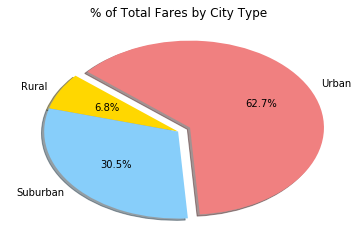

In [4]:
# Calculate Type Percents
tcf = pyber_data.groupby(['type'])['fare'].sum()
# Build Pie Chart
colors = ['gold', 'lightskyblue','lightcoral']
explode = (0,0,0.1)
plt.pie(tcf, labels = tcf.index , autopct = "%1.1f%%",
        colors = colors, explode = explode,
        shadow = True, startangle = 140)
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig('Total Fares by City Type')
# Show Figure
plt.show()

## Total Rides by City Type

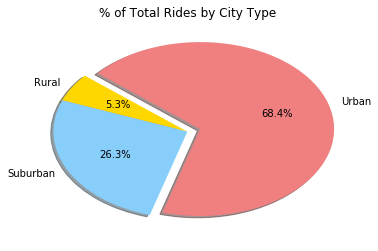

In [5]:
# Calculate Ride Percents
tcr = pyber_data.groupby(['type'])['ride_id'].count()
# Build Pie Chart
colors = ['gold', 'lightskyblue','lightcoral']
explode = (0,0,0.1)
plt.pie(tcr, labels = tcr.index , autopct = "%1.1f%%",
        colors = colors, explode = explode,
        shadow = True, startangle = 140)
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig('Total Rides by City Type')
# Show Figure
plt.show()

## Total Drivers by City Type

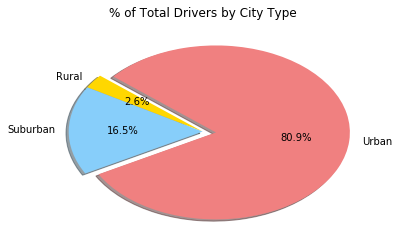

In [6]:
# Calculate Driver Percents
tcd = city_data_df.groupby(["type"])["driver_count"].sum()
# Build Pie Charts
colors = ['gold', 'lightskyblue','lightcoral']
explode = (0,0,0.1)
plt.pie(tcd, labels = tcd.index , autopct = "%1.1f%%",
        colors = colors, explode = explode,
        shadow = True, startangle = 140)
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig('Total Drivers by City Type')
# Show Figure
plt.show()